In [1]:
import numpy as np; import pandas as pd; import matplotlib.pyplot as plt; import seaborn as sns; import wordcloud; import json; import re

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 2000)

In [3]:
csv_fields = [ "category", "currency", "customer_first_name", "customer_full_name", "customer_gender", "customer_id", "customer_last_name", "customer_phone", "day_of_week", "day_of_week_i", "email", "geoip.city_name", "geoip.continent_name", "geoip.country_iso_code", "geoip.location", "geoip.region_name", "manufacturer", "order_date", "order_id", "products", "products.created_on", "sku", "taxful_total_price", "taxless_total_price", "total_quantity", "total_unique_products", "type", "user" ]

In [4]:
df = pd.read_csv('D:/datasets/ecommerce-data-output/ecommerce-output.csv', index_col='order_date', names=csv_fields, parse_dates=['order_date'], encoding='gbk')

In [5]:
df.head()

,category,currency,customer_first_name,customer_full_name,customer_gender,customer_id,customer_last_name,customer_phone,day_of_week,day_of_week_i,email,geoip.city_name,geoip.continent_name,geoip.country_iso_code,geoip.location,geoip.region_name,manufacturer,order_id,products,products.created_on,sku,taxful_total_price,taxless_total_price,total_quantity,total_unique_products,type,user
order_date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-18 09:28:48,"[""Men's Clothing""]",EUR,Eddie,Eddie Underwood,MALE,38,Underwood,NaN,Monday,0,eddie@underwood-family.zzz,Cairo,Africa,EG,"{""lon"":31.3,""lat"":30.1}",Cairo Governorate,"[""Elitelligence"", ""Oceanavigations""]",584677,"[{""category""=>""Men's Clothing"", ""min_price""=>0.635e1, ""discount_percentage""=>0, ""tax_amount""=>0, ""price""=>0.1199e2, ""discount_amount""=>0, ""base_price""=>0.1199e2, ""created_on""=>""2016-12-26T09:28:48+00:00"", ""product_name""=>""Basic T-shirt - dark blue/white"", ""taxful_price""=>0.1199e2, ""_id""=>""sold_product_584677_6283"", ""manufacturer""=>""Elitelligence"", ""unit_discount_amount""=>0, ""sku""=>""ZO0549605496"", ""taxless_price""=>0.1199e2, ""quantity""=>1, ""product_id""=>6283, ""base_unit_price""=>0.1199e2}, {""category""=>""Men's Clothing"", ""min_price""=>0.1175e2, ""discount_percentage""=>0, ""tax_amount""=>0, ""price""=>0.2499e2, ""discount_amount""=>0, ""base_price""=>0.2499e2, ""created_on""=>""2016-12-26T09:28:48+00:00"", ""product_name""=>""Sweatshirt - grey multicolor"", ""taxful_price""=>0.2499e2, ""_id""=>""sold_product_584677_19400"", ""manufacturer""=>""Oceanavigations"", ""unit_discount_amount""=>0, ""sku""=>""ZO0299602996"", ""taxless_price""=>0.2499e2, ""quantity""=>1, ""product_id""=>19400, ""base_unit_price""=>0.2499e2}]",NaN,"[""ZO0549605496"", ""ZO0299602996""]",36.98,36.98,2,2,order,eddie
2019-11-17 21:59:02,"[""Women's Clothing""]",EUR,Mary,Mary Bailey,FEMALE,20,Bailey,NaN,Sunday,6,mary@bailey-family.zzz,Dubai,Asia,AE,"{""lon"":55.3,""lat"":25.3}",Dubai,"[""Champion Arts"", ""Pyramidustries""]",584021,"[{""category""=>""Women's Clothing"", ""min_price""=>0.1175e2, ""discount_percentage""=>0, ""tax_amount""=>0, ""price""=>0.2499e2, ""discount_amount""=>0, ""base_price""=>0.2499e2, ""created_on""=>""2016-12-25T21:59:02+00:00"", ""product_name""=>""Denim dress - black denim"", ""taxful_price""=>0.2499e2, ""_id""=>""sold_product_584021_11238"", ""manufacturer""=>""Champion Arts"", ""unit_discount_amount""=>0, ""sku""=>""ZO0489604896"", ""taxless_price""=>0.2499e2, ""quantity""=>1, ""product_id""=>11238, ""base_unit_price""=>0.2499e2}, {""category""=>""Women's Clothing"", ""min_price""=>0.1565e2, ""discount_percentage""=>0, ""tax_amount""=>0, ""price""=>0.2899e2, ""discount_amount""=>0, ""base_price""=>0.2899e2, ""created_on""=>""2016-12-25T21:59:02+00:00"", ""product_name""=>""Shorts - black"", ""taxful_price""=>0.2899e2, ""_id""=>""sold_product_584021_20149"", ""manufacturer""=>""Pyramidustries"", ""unit_discount_amount""=>0, ""sku""=>""ZO0185501855"", ""taxless_price""=>0.2899e2, ""quantity""=>1, ""product_id""=>20149, ""base_unit_price""=>0.2899e2}]",NaN,"[""ZO0489604896"", ""ZO0185501855""]",53.98,53.98,2,2,order,mary
2019-11-17 22:32:10,"[""Women's Shoes"", ""Women's Clothing""]",EUR,Gwen,Gwen Butler,FEMALE,26,Butler,NaN,Sunday,6,gwen@butler-family.zzz,Los Angeles,North America,US,"{""lon"":-118.2,""lat"":34.1}",California,"[""Low Tide Media"", ""Oceanavigations""]",584058,"[{""category""=>""Women's Shoes"", ""min_price""=>46, ""discount_percentage""=>0, ""tax_amount""=>0, ""price""=>0.9999e2, ""discount_amount""=>0, ""base_price""=>0.9999e2, ""created_on""=>""2016-12-25T22:32:10+00:00"", ""product_name""=>""Boots - Midnight Blue"", ""taxful_price""=>0.9999e2, ""_id""=>""sold_product_584058_22794"", ""manufacturer""=>""Low Tide Media"", ""unit_discount_amount""=>0, ""sku""=>""ZO0374603746"", ""taxless_price""=>0.9999e2, ""quantity""=>1, ""product_id""=>22794, ""base_unit_price""=>0.9999e2}, {""category""=>""Women's Clothing""

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4675 entries, 2019-11-18 09:28:48 to 2019-11-05 13:10:34
Data columns (total 27 columns):
category                  4675 non-null object
currency                  4675 non-null object
customer_first_name       4675 non-null object
customer_full_name        4675 non-null object
customer_gender           4675 non-null object
customer_id               4675 non-null int64
customer_last_name        4675 non-null object
customer_phone            0 non-null float64
day_of_week               4675 non-null object
day_of_week_i             4675 non-null int64
email                     4675 non-null object
geoip.city_name           4094 non-null object
geoip.continent_name      4675 non-null object
geoip.country_iso_code    4675 non-null object
geoip.location            4675 non-null object
geoip.region_name         3924 non-null object
manufacturer              4675 non-null object
order_id                  4675 non-null int64
products        

In [7]:
df.drop(columns=['customer_phone', 'products.created_on'], inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4675 entries, 2019-11-18 09:28:48 to 2019-11-05 13:10:34
Data columns (total 25 columns):
category                  4675 non-null object
currency                  4675 non-null object
customer_first_name       4675 non-null object
customer_full_name        4675 non-null object
customer_gender           4675 non-null object
customer_id               4675 non-null int64
customer_last_name        4675 non-null object
day_of_week               4675 non-null object
day_of_week_i             4675 non-null int64
email                     4675 non-null object
geoip.city_name           4094 non-null object
geoip.continent_name      4675 non-null object
geoip.country_iso_code    4675 non-null object
geoip.location            4675 non-null object
geoip.region_name         3924 non-null object
manufacturer              4675 non-null object
order_id                  4675 non-null int64
products                  4675 non-null object
sku           

In [9]:
df.sort_index(inplace=True)

In [10]:
df['category'] = df['category'].str.findall("\"(.*?)\"")

In [11]:
df['category']

order_date
2019-10-24 00:04:19                                          [Men's Clothing]
2019-10-24 00:08:38                   [Women's Clothing, Women's Accessories]
2019-10-24 00:23:02                      [Women's Shoes, Women's Accessories]
2019-10-24 00:33:07                                             [Men's Shoes]
2019-10-24 00:47:31                                             [Men's Shoes]
2019-10-24 00:50:24    [Women's Accessories, Women's Shoes, Women's Clothing]
2019-10-24 00:54:43                                     [Women's Accessories]
2019-10-24 01:16:19                      [Women's Shoes, Women's Accessories]
2019-10-24 01:27:50                         [Women's Clothing, Women's Shoes]
2019-10-24 01:32:10                                           [Women's Shoes]
2019-10-24 01:37:55                                           [Women's Shoes]
2019-10-24 01:39:22                             [Men's Shoes, Men's Clothing]
2019-10-24 01:53:46                   [Women's Clothi

In [12]:
df['manufacturer'] = df['manufacturer'].str.findall("\"(.*?)\"")

In [13]:
df['manufacturer']

order_date
2019-10-24 00:04:19                                     [Elitelligence, Spritechnologies]
2019-10-24 00:08:38                                         [Oceanavigations, Gnomehouse]
2019-10-24 00:23:02                                [Oceanavigations, Tigress Enterprises]
2019-10-24 00:33:07                                            [Elitelligence, Angeldale]
2019-10-24 00:47:31                                      [Oceanavigations, Elitelligence]
2019-10-24 00:50:24    [Pyramidustries, Oceanavigations, Gnomehouse, Tigress Enterprises]
2019-10-24 00:54:43                                     [Oceanavigations, Pyramidustries]
2019-10-24 01:16:19                                               [Gnomehouse, Angeldale]
2019-10-24 01:27:50                                        [Oceanavigations, Primemaster]
2019-10-24 01:32:10                                     [Pyramidustries, Oceanavigations]
2019-10-24 01:37:55                                          [Oceanavigations, Angeldale]

In [14]:
df['sku'] = df['sku'].str.findall("\"(.*?)\"")

In [15]:
df['sku']

order_date
2019-10-24 00:04:19                                [ZO0567505675, ZO0622006220]
2019-10-24 00:08:38                                [ZO0267102671, ZO0357703577]
2019-10-24 00:23:02                                [ZO0240802408, ZO0083400834]
2019-10-24 00:33:07                                [ZO0508905089, ZO0681206812]
2019-10-24 00:47:31                                [ZO0256602566, ZO0516305163]
2019-10-24 00:50:24    [ZO0205902059, ZO0242802428, ZO0338503385, ZO0089900899]
2019-10-24 00:54:43                                [ZO0303703037, ZO0195801958]
2019-10-24 01:16:19                                [ZO0325803258, ZO0696306963]
2019-10-24 01:27:50                                [ZO0260702607, ZO0363203632]
2019-10-24 01:32:10                                [ZO0143501435, ZO0235902359]
2019-10-24 01:37:55                                [ZO0243802438, ZO0667606676]
2019-10-24 01:39:22                                [ZO0688006880, ZO0450504505]
2019-10-24 01:53:46    [ZO035

In [16]:
df['products'] = df['products'].str.replace('=>', ': ')

In [17]:
df['products']

order_date
2019-10-24 00:04:19                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [18]:
json.loads(df['products'][0])

[{'category': "Men's Clothing",
  'min_price': 5.5,
  'discount_percentage': 0,
  'tax_amount': 0,
  'price': 10.99,
  'discount_amount': 0,
  'base_price': 10.99,
  'created_on': '2016-12-01T00:04:19+00:00',
  'product_name': 'Basic T-shirt - Medium Slate Blue',
  'taxful_price': 10.99,
  '_id': 'sold_product_550375_23771',
  'manufacturer': 'Elitelligence',
  'unit_discount_amount': 0,
  'sku': 'ZO0567505675',
  'taxless_price': 10.99,
  'quantity': 1,
  'product_id': 23771,
  'base_unit_price': 10.99},
 {'category': "Men's Clothing",
  'min_price': 12,
  'discount_percentage': 0,
  'tax_amount': 0,
  'price': 24.99,
  'discount_amount': 0,
  'base_price': 24.99,
  'created_on': '2016-12-01T00:04:19+00:00',
  'product_name': 'Tracksuit bottoms - black',
  'taxful_price': 24.99,
  '_id': 'sold_product_550375_20709',
  'manufacturer': 'Spritechnologies',
  'unit_discount_amount': 0,
  'sku': 'ZO0622006220',
  'taxless_price': 24.99,
  'quantity': 1,
  'product_id': 20709,
  'base_unit_

In [19]:
pd.DataFrame(json.loads(df['products'][0]))

,_id,base_price,base_unit_price,category,created_on,discount_amount,discount_percentage,manufacturer,min_price,price,product_id,product_name,quantity,sku,tax_amount,taxful_price,taxless_price,unit_discount_amount
0,sold_product_550375_23771,10.99,10.99,Men's Clothing,2016-12-01T00:04:19+00:00,0,0,Elitelligence,5.5,10.99,23771,Basic T-shirt - Medium Slate Blue,1,ZO0567505675,0,10.99,10.99,0
1,sold_product_550375_20709,24.99,24.99,Men's Clothing,2016-12-01T00:04:19+00:00,0,0,Spritechnologies,12.0,24.99,20709,Tracksuit bottoms - black,1,ZO0622006220,0,24.99,24.99,0


In [20]:
np.full(len(json.loads(df['products'][0])), df['order_id'][0])

array([550375, 550375], dtype=int64)

In [21]:
products_info = pd.DataFrame()
order_id = pd.DataFrame()
for i in np.arange(len(df)):
    products_info = pd.concat([products_info, pd.DataFrame(json.loads(df['products'][i]))], ignore_index=True)
    order_id = pd.concat([order_id, pd.DataFrame(np.full(len(json.loads(df['products'][i])), df['order_id'][i]))], ignore_index=True)

In [22]:
products_info

,_id,base_price,base_unit_price,category,created_on,discount_amount,discount_percentage,manufacturer,min_price,price,product_id,product_name,quantity,sku,tax_amount,taxful_price,taxless_price,unit_discount_amount
0,sold_product_550375_23771,10.99,10.99,Men's Clothing,2016-12-01T00:04:19+00:00,0.0,0,Elitelligence,5.50,10.99,23771,Basic T-shirt - Medium Slate Blue,1,ZO0567505675,0,10.99,10.99,0.0
1,sold_product_550375_20709,24.99,24.99,Men's Clothing,2016-12-01T00:04:19+00:00,0.0,0,Spritechnologies,12.00,24.99,20709,Tracksuit bottoms - black,1,ZO0622006220,0,24.99,24.99,0.0
2,sold_product_550385_20002,49.99,49.99,Women's Clothing,2016-12-01T00:08:38+00:00,0.0,0,Oceanavigations,23.50,49.99,20002,Bomber Jacket - gold,1,ZO0267102671,0,49.99,49.99,0.0
3,sold_product_550385_18345,32.99,32.99,Women's Accessories,2016-12-01T00:08:38+00:00,0.0,0,Gnomehouse,17.15,32.99,18345,Rucksack - brandy,1,ZO0357703577,0,32.99,32.99,0.0
4,sold_product_550405_14517,59.99,59.99,Women's Shoes,2016-12-01T00:23:02+00:00,0.0,0,Oceanavigations,30.59,59.99,14517,Trainers - rosa,1,ZO0240802408,0,59.99,59.99,0.0
5,sold_product_550405_14132,11.99,11.99,Women's Accessories,2016-12-01T00:23:02+00:00,0.0,0,Tigress Enterprises,6.35,11.99,14132,Scarf - offwhite,1,ZO0083400834,0,11.99,11.99,0.0
6,sold_product_550412_13217,20.99,20.99,Men's Shoes,2016-12-01T00:33:07+00:00,0.0,0,Elitelligence,9.87,20.99,13217,Trainers - white/black,1,ZO0508905089,0,20.99,20.99,0.0
7,sold_product_550412_1384,59.99,59.99,Men's Shoes,2016-12-01T00:33:07+00:00,0.0,0,Angeldale,31.19,59.99,1384,Lace-ups - black,1,ZO0681206812,0,59.99,59.99,0.0
8,sold_product_550425_1049,64.99,64.99,Men's Shoes,2016-12-01T00:47:31+00:00,0.0,0,Oceanavigations,30.55,64.99,1049,Boots - black,1,ZO0256602566,0,64.99,64.99,0.0
9,sold_product_550425_15074,20.99,20.99,Men's Shoes,2016-12-01T00:47:31+00:00,0.0,0,Elitelligence,10.08,20.99,15074,Trainers - navy,1,ZO0516305163,0,20.99,20.99,0.0


In [23]:
products_info['order_id'] = order_id

In [24]:
products_info.set_index('order_id', inplace=True)

In [25]:
products_info = pd.merge(df[['order_id']], products_info, left_on='order_id', right_index=True, how='outer')

In [26]:
products_info

,order_id,_id,base_price,base_unit_price,category,created_on,discount_amount,discount_percentage,manufacturer,min_price,price,product_id,product_name,quantity,sku,tax_amount,taxful_price,taxless_price,unit_discount_amount
order_date,,,,,,,,,,,,,,,,,,,
2019-10-24 00:04:19,550375,sold_product_550375_23771,10.99,10.99,Men's Clothing,2016-12-01T00:04:19+00:00,0.0,0,Elitelligence,5.50,10.99,23771,Basic T-shirt - Medium Slate Blue,1,ZO0567505675,0,10.99,10.99,0.0
2019-10-24 00:04:19,550375,sold_product_550375_20709,24.99,24.99,Men's Clothing,2016-12-01T00:04:19+00:00,0.0,0,Spritechnologies,12.00,24.99,20709,Tracksuit bottoms - black,1,ZO0622006220,0,24.99,24.99,0.0
2019-10-24 00:08:38,550385,sold_product_550385_20002,49.99,49.99,Women's Clothing,2016-12-01T00:08:38+00:00,0.0,0,Oceanavigations,23.50,49.99,20002,Bomber Jacket - gold,1,ZO0267102671,0,49.99,49.99,0.0
2019-10-24 00:08:38,550385,sold_product_550385_18345,32.99,32.99,Women's Accessories,2016-12-01T00:08:38+00:00,0.0,0,Gnomehouse,17.15,32.99,18345,Rucksack - brandy,1,ZO0357703577,0,32.99,32.99,0.0
2019-10-24 00:23:02,550405,sold_product_550405_14517,59.99,59.99,Women's Shoes,2016-12-01T00:23:02+00:00,0.0,0,Oceanavigations,30.59,59.99,14517,Trainers - rosa,1,ZO0240802408,0,59.99,59.99,0.0
2019-10-24 00:23:02,550405,sold_product_550405_14132,11.99,11.99,Women's Accessories,2016-12-01T00:23:02+00:00,0.0,0,Tigress Enterprises,6.35,11.99,14132,Scarf - offwhite,1,ZO0083400834,0,11.99,11.99,0.0
2019-10-24 00:33:07,550412,sold_product_550412_13217,20.99,20.99,Men's Shoes,2016-12-01T00:33:07+00:00,0.0,0,Elitelligence,9.87,20.99,13217,Trainers - white/black,1,ZO0508905089,0,20.99,20.99,0.0
2019-10-24 00:33:07,550412,sold_product_550412_1384,59.99,59.99,Men's Shoes,2016-12-01T00:33:07+00:00,0.0,0,Angeldale,31.19,59.99,1384,Lace-ups - black,1,ZO0681206812,0,59.99,59.99,0.0
2019-10-24 00:47:31,550425,sold_product_550425_1049,64.99,64.99,Men's Shoes,2016-12-01T00:47:31+00:00,0.0,0,Oceanavigations,30.55,64.99,1049,Boots - black,1,ZO0256602566,0,64.99,64.99,0.0


In [27]:
products_order = products_info.set_index('_id', append=True)

In [28]:
products_info.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10087 entries, 2019-10-24 00:04:19 to 2019-11-23 23:45:36
Data columns (total 19 columns):
order_id                10087 non-null int64
_id                     10087 non-null object
base_price              10087 non-null float64
base_unit_price         10087 non-null float64
category                10087 non-null object
created_on              10087 non-null object
discount_amount         10087 non-null float64
discount_percentage     10087 non-null int64
manufacturer            10087 non-null object
min_price               10087 non-null float64
price                   10087 non-null float64
product_id              10087 non-null int64
product_name            10087 non-null object
quantity                10087 non-null int64
sku                     10087 non-null object
tax_amount              10087 non-null int64
taxful_price            10087 non-null float64
taxless_price           10087 non-null float64
unit_discount_amount    10

In [29]:
df.groupby('customer_gender').size()

customer_gender
FEMALE    2433
MALE      2242
dtype: int64

Text(0.5,1,'Sales by Gender')

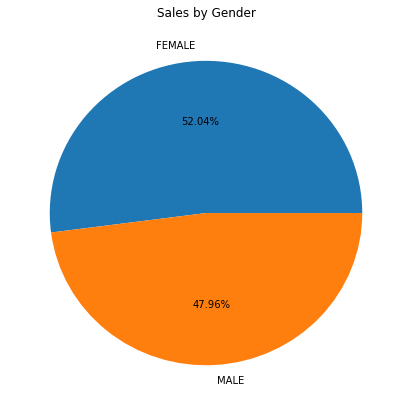

In [30]:
fig = plt.figure(figsize=(7, 7))
plt.pie(df.groupby('customer_gender').size().values, labels=df.groupby('customer_gender').size().index, autopct='%1.2f%%')
plt.title('Sales by Gender')

In [31]:
products_info.groupby('category').resample('12H').size()

order_date,2019-10-24 00:00:00,2019-10-24 12:00:00,2019-10-25 00:00:00,2019-10-25 12:00:00,2019-10-26 00:00:00,2019-10-26 12:00:00,2019-10-27 00:00:00,2019-10-27 12:00:00,2019-10-28 00:00:00,2019-10-28 12:00:00,2019-10-29 00:00:00,2019-10-29 12:00:00,2019-10-30 00:00:00,2019-10-30 12:00:00,2019-10-31 00:00:00,2019-10-31 12:00:00,2019-11-01 00:00:00,2019-11-01 12:00:00,2019-11-02 00:00:00,2019-11-02 12:00:00,2019-11-03 00:00:00,2019-11-03 12:00:00,2019-11-04 00:00:00,2019-11-04 12:00:00,2019-11-05 00:00:00,2019-11-05 12:00:00,2019-11-06 00:00:00,2019-11-06 12:00:00,2019-11-07 00:00:00,2019-11-07 12:00:00,2019-11-08 00:00:00,2019-11-08 12:00:00,2019-11-09 00:00:00,2019-11-09 12:00:00,2019-11-10 00:00:00,2019-11-10 12:00:00,2019-11-11 00:00:00,2019-11-11 12:00:00,2019-11-12 00:00:00,2019-11-12 12:00:00,2019-11-13 00:00:00,2019-11-13 12:00:00,2019-11-14 00:00:00,2019-11-14 12:00:00,2019-11-15 00:00:00,2019-11-15 12:00:00,2019-11-16 00:00:00,2019-11-16 12:00:00,2019-11-17 00:00:00,2019-11-17 12:00:00,2019-11-18 00:00:00,2019-11-18 12:00:00,2019-11-19 00:00:00,2019-11-19 12:00:00,2019-11-20 00:00:00,2019-11-20 12:00:00,2019-11-21 00:00:00,2019-11-21 12:00:00,2019-11-22 00:00:00,2019-11-22 12:00:00,2019-11-23 00:00:00,2019-11-23 12:00:00
category,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Men's Accessories,4,14,7,8,15,6,8,10,11,8,9,12,8,9,14,8,9,11,11,11,10,5,6,7,9,11,9,14,12,11,8,13,7,8,8,7,10,9,14,8,12,13,6,6,10,7,10,6,16,14,14,8,9,11,12,15,13,14,9,9,18,6
Men's Clothing,32,49,60,43,51,58,65,42,44,38,58,55,52,65,57,44,64,61,53,44,49,43,42,57,44,60,54,49,56,49,40,51,69,42,47,53,60,46,37,48,41,48,68,54,52,51,57,62,45,67,60,39,48,58,54,55,60,56,52,52,65,41
Men's Shoes,13,13,17,26,10,11,19,11,11,12,12,14,19,19,13,13,23,23,10,16,11,20,15,24,13,20,13,32,24,19,17,14,22,12,17,30,14,10,18,19,18,24,16,20,21,18,18,16,20,28,17,22,17,22,26,17,16,21,20,25,18,22
Women's Accessories,25,16,15,21,18,14,13,11,13,13,17,13,16,13,20,22,8,16,12,15,13,15,16,10,10,11,13,11,15,14,12,12,17,17,18,17,12,20,15,17,13,16,22,14,20,18,23,6,14,10,18,9,16,12,17,13,17,20,15,18,7,9
Women's Clothing,43,51,33,56,36,45,37,41,50,46,47,45,42,37,41,48,66,45,42,44,48,50,55,37,55,38,37,47,58,36,49,31,45,53,48,46,53,44,49,51,49,33,40,46,56,53,52,40,51,32,48,49,42,52,43,59,50,37,53,49,33,35
Women's Shoes,37,21,22,26,16,22,18,25,21,29,21,26,17,19,19,31,18,24,16,22,21,31,20,21,17,22,14,19,25,22,22,24,22,25,20,18,23,16,26,26,22,15,15,30,18,16,20,13,34,29,21,36,28,25,16,26,27,16,21,25,25,31


In [32]:
df[df['total_quantity'] == df['total_unique_products']].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4674 entries, 2019-10-24 00:04:19 to 2019-11-23 23:45:36
Data columns (total 25 columns):
category                  4674 non-null object
currency                  4674 non-null object
customer_first_name       4674 non-null object
customer_full_name        4674 non-null object
customer_gender           4674 non-null object
customer_id               4674 non-null int64
customer_last_name        4674 non-null object
day_of_week               4674 non-null object
day_of_week_i             4674 non-null int64
email                     4674 non-null object
geoip.city_name           4094 non-null object
geoip.continent_name      4674 non-null object
geoip.country_iso_code    4674 non-null object
geoip.location            4674 non-null object
geoip.region_name         3924 non-null object
manufacturer              4674 non-null object
order_id                  4674 non-null int64
products                  4674 non-null object
sku           

In [33]:
products_info['taxful_price'][products_info['product_name'].str.contains('trouser', flags=re.IGNORECASE)]

order_date
2019-10-24 05:42:43    28.99
2019-10-25 16:24:58    74.99
2019-10-26 01:58:05    24.99
2019-10-26 03:08:38    32.99
2019-10-26 03:48:58    32.99
2019-10-26 07:40:48    49.99
2019-10-26 10:53:46    28.99
2019-10-26 13:33:36    25.99
2019-10-27 01:48:00    28.99
2019-10-27 02:38:24    24.99
2019-10-27 04:58:05    32.99
2019-10-27 06:40:19    25.99
2019-10-27 23:49:55    28.99
2019-10-28 01:42:14    24.99
2019-10-28 04:04:48    18.99
2019-10-28 13:26:24    32.99
2019-10-28 17:34:05    18.99
2019-10-28 20:12:29    74.99
2019-10-29 02:55:41    41.99
2019-10-29 03:48:58    28.99
2019-10-29 04:40:48    16.99
2019-10-29 06:05:46    43.99
2019-10-29 15:01:26    49.99
2019-10-29 19:52:19    32.99
2019-10-29 23:35:31    24.99
2019-10-30 02:05:17    41.99
2019-10-30 10:48:00    21.99
2019-10-30 18:07:12    41.99
2019-10-30 22:09:07    32.99
2019-10-31 06:21:36    33.99
                       ...  
2019-11-17 03:47:31    33.99
2019-11-17 09:37:26    28.99
2019-11-17 10:42:14    21.99
201

In [34]:
revenue_trousers = products_info['taxful_price'][products_info['product_name'].str.contains('trouser', flags=re.IGNORECASE)] * products_info['quantity'][products_info['product_name'].str.contains('trouser', flags=re.IGNORECASE)]

In [35]:
revenue_watches = products_info['taxful_price'][products_info['product_name'].str.contains('watch', flags=re.IGNORECASE)] * products_info['quantity'][products_info['product_name'].str.contains('watch', flags=re.IGNORECASE)]

In [36]:
revenue_bags = products_info['taxful_price'][products_info['product_name'].str.contains('bag', flags=re.IGNORECASE)] * products_info['quantity'][products_info['product_name'].str.contains('bag', flags=re.IGNORECASE)]

In [37]:
revenue_cocktail_dresses = products_info['taxful_price'][products_info['product_name'].str.contains('cocktail dress', flags=re.IGNORECASE)] * products_info['quantity'][products_info['product_name'].str.contains('cocktail dress', flags=re.IGNORECASE)]

In [38]:
revenue_trousers.resample('12H').sum()

order_date
2019-10-24 00:00:00     28.99
2019-10-24 12:00:00      0.00
2019-10-25 00:00:00      0.00
2019-10-25 12:00:00     74.99
2019-10-26 00:00:00    169.95
2019-10-26 12:00:00     25.99
2019-10-27 00:00:00    112.96
2019-10-27 12:00:00     28.99
2019-10-28 00:00:00     43.98
2019-10-28 12:00:00    126.97
2019-10-29 00:00:00    131.96
2019-10-29 12:00:00    107.97
2019-10-30 00:00:00     63.98
2019-10-30 12:00:00     74.98
2019-10-31 00:00:00     33.99
2019-10-31 12:00:00      0.00
2019-11-01 00:00:00     89.98
2019-11-01 12:00:00     64.99
2019-11-02 00:00:00      0.00
2019-11-02 12:00:00     46.98
2019-11-03 00:00:00      0.00
2019-11-03 12:00:00     28.99
2019-11-04 00:00:00     32.99
2019-11-04 12:00:00     24.99
2019-11-05 00:00:00     54.98
2019-11-05 12:00:00    116.98
2019-11-06 00:00:00    156.95
2019-11-06 12:00:00     79.97
2019-11-07 00:00:00     21.99
2019-11-07 12:00:00      0.00
                        ...  
2019-11-09 00:00:00     61.98
2019-11-09 12:00:00     24.99

In [39]:
revenue_watches.resample('12H').sum()

order_date
2019-10-24 00:00:00     37.98
2019-10-24 12:00:00     35.98
2019-10-25 00:00:00     72.97
2019-10-25 12:00:00    111.95
2019-10-26 00:00:00     53.98
2019-10-26 12:00:00     16.99
2019-10-27 00:00:00     53.98
2019-10-27 12:00:00     14.99
2019-10-28 00:00:00     29.98
2019-10-28 12:00:00    107.95
2019-10-29 00:00:00     17.99
2019-10-29 12:00:00    125.95
2019-10-30 00:00:00     54.98
2019-10-30 12:00:00     32.99
2019-10-31 00:00:00     53.98
2019-10-31 12:00:00     73.97
2019-11-01 00:00:00     20.99
2019-11-01 12:00:00    118.95
2019-11-02 00:00:00     18.99
2019-11-02 12:00:00     50.98
2019-11-03 00:00:00     38.98
2019-11-03 12:00:00      0.00
2019-11-04 00:00:00     44.98
2019-11-04 12:00:00      0.00
2019-11-05 00:00:00      0.00
2019-11-05 12:00:00     24.99
2019-11-06 00:00:00     82.97
2019-11-06 12:00:00     63.98
2019-11-07 00:00:00     87.97
2019-11-07 12:00:00      0.00
                        ...  
2019-11-09 00:00:00     20.99
2019-11-09 12:00:00     61.97

In [40]:
revenue_bags.resample('12H').sum()

order_date
2019-10-24 00:00:00    446.85
2019-10-24 12:00:00    368.87
2019-10-25 00:00:00     97.96
2019-10-25 12:00:00    134.95
2019-10-26 00:00:00    215.91
2019-10-26 12:00:00    139.96
2019-10-27 00:00:00    375.90
2019-10-27 12:00:00    374.93
2019-10-28 00:00:00    151.94
2019-10-28 12:00:00    174.94
2019-10-29 00:00:00    280.93
2019-10-29 12:00:00    126.97
2019-10-30 00:00:00    566.88
2019-10-30 12:00:00    133.96
2019-10-31 00:00:00    393.88
2019-10-31 12:00:00    255.94
2019-11-01 00:00:00    352.91
2019-11-01 12:00:00    572.89
2019-11-02 00:00:00    430.89
2019-11-02 12:00:00    561.87
2019-11-03 00:00:00    174.94
2019-11-03 12:00:00    355.92
2019-11-04 00:00:00    198.95
2019-11-04 12:00:00    217.93
2019-11-05 00:00:00    268.92
2019-11-05 12:00:00    340.92
2019-11-06 00:00:00    261.93
2019-11-06 12:00:00    473.88
2019-11-07 00:00:00    602.89
2019-11-07 12:00:00    252.93
                        ...  
2019-11-09 00:00:00    350.88
2019-11-09 12:00:00    372.92

In [41]:
revenue_cocktail_dresses.resample('12H').sum()

order_date
2019-10-24 00:00:00     74.99
2019-10-24 12:00:00     41.99
2019-10-25 00:00:00      0.00
2019-10-25 12:00:00      0.00
2019-10-26 00:00:00    159.98
2019-10-26 12:00:00     41.99
2019-10-27 00:00:00     37.99
2019-10-27 12:00:00      0.00
2019-10-28 00:00:00    189.97
2019-10-28 12:00:00      0.00
2019-10-29 00:00:00      0.00
2019-10-29 12:00:00      0.00
2019-10-30 00:00:00      0.00
2019-10-30 12:00:00      0.00
2019-10-31 00:00:00     49.99
2019-10-31 12:00:00     41.99
2019-11-01 00:00:00     59.99
2019-11-01 12:00:00      0.00
2019-11-02 00:00:00      0.00
2019-11-02 12:00:00      0.00
2019-11-03 00:00:00      0.00
2019-11-03 12:00:00     74.99
2019-11-04 00:00:00     41.99
2019-11-04 12:00:00     82.98
2019-11-05 00:00:00     49.99
2019-11-05 12:00:00      0.00
2019-11-06 00:00:00      0.00
2019-11-06 12:00:00      0.00
2019-11-07 00:00:00      0.00
2019-11-07 12:00:00     59.99
                        ...  
2019-11-09 00:00:00      0.00
2019-11-09 12:00:00     47.99

Text(0.5,1,'Promotion Tracking')

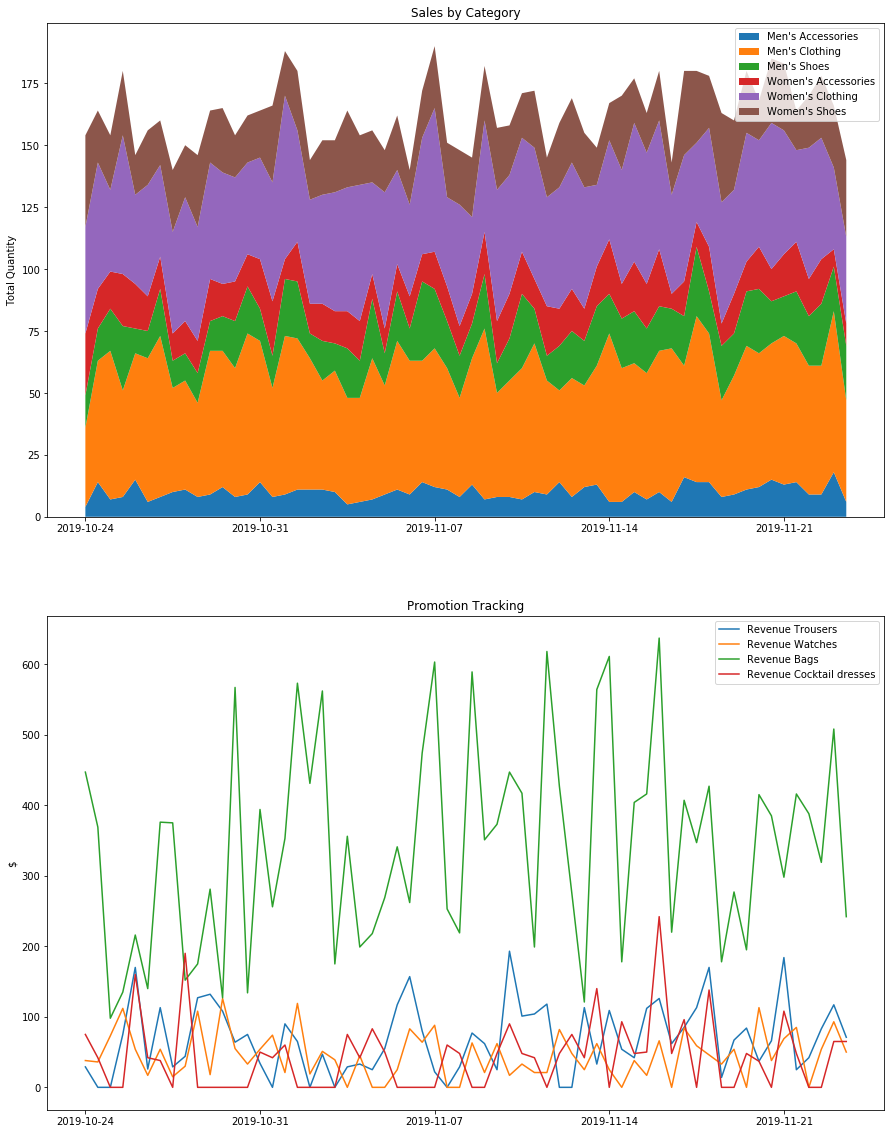

In [47]:
fig, axes = plt.subplots(2, 1, figsize=(15, 20))
axes[0].stackplot(products_info.groupby('category').resample('12H').size().columns, products_info.groupby('category').resample('12H').size().values, labels=products_info.groupby('category').resample('12H').size().index)
axes[0].legend(loc='upper right')
axes[0].set_ylabel('Total Quantity')
axes[0].set_title('Sales by Category')
axes[1].plot(revenue_trousers.resample('12H').sum().index, revenue_trousers.resample('12H').sum().values, label='Revenue Trousers')
axes[1].plot(revenue_watches.resample('12H').sum().index, revenue_watches.resample('12H').sum().values, label='Revenue Watches')
axes[1].plot(revenue_bags.resample('12H').sum().index, revenue_bags.resample('12H').sum().values, label='Revenue Bags')
axes[1].plot(revenue_cocktail_dresses.resample('12H').sum().index, revenue_cocktail_dresses.resample('12H').sum().values, label='Revenue Cocktail dresses')
axes[1].legend(loc='upper right')
axes[1].set_ylabel('\$')
axes[1].set_title('Promotion Tracking')

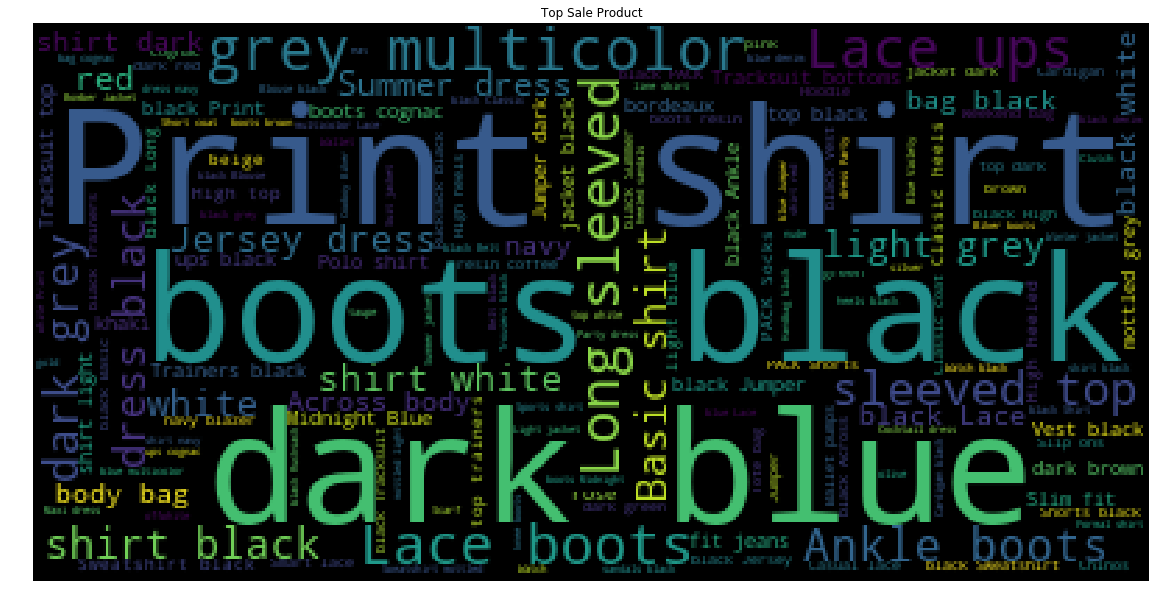

In [56]:
wc_top_sale = wordcloud.WordCloud()
wc_top_sale.generate(products_info['product_name'].str.cat(sep='|'))
plt.figure(figsize=(20, 12))
plt.imshow(wc_top_sale)
plt.axis('off')
plt.title('Top Sale Product')
plt.show()